<a href="https://colab.research.google.com/github/elan-wilkinson/OrientationDetectionLegoAerospaceAssembly/blob/main/Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploration of Orientation Detection of Lego Aerospace Assembly

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle.zip'
extract_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped'

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: count files in ontent/drive/MyDrive/CV_FinalProj_Data/shuttle/shuttle_unzipped/shuttle/shuttle_main/

import os

target_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/'
file_count = 0
files = []

if os.path.exists(target_dir):
  file_count = len([name for name in os.listdir(target_dir) if os.path.isfile(os.path.join(target_dir, name))])
  print(f"Number of files in {target_dir}: {file_count}")
else:
  print(f"Directory '{target_dir}' not found.")

KeyboardInterrupt: 

In [ ]:
# prompt: list the files only not folders in this directory "'/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/'"

import os

target_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/'

if os.path.exists(target_dir):
  files = [name for name in os.listdir(target_dir) if os.path.isfile(os.path.join(target_dir, name))]
  print(f"Files in {target_dir}:")
  for file in files:
    print(file)
else:
  print(f"Directory '{target_dir}' not found.")

Files in /content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/:
shuttle_main_rotations.txt
annotation_definitions.json
metadata.json
metric_definitions.json
sensor_definitions.json


In [ ]:
images = '/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex'

In [ ]:
text_file = '/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/rotations.txt'

In [ ]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
!pip install ultralytics
!pip install yolov5

Looking in indexes: https://download.pytorch.org/whl/cu118
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 896.9/896.9 kB 17.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 2.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.5/953.5 kB 21.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.5/417.5 kB 36.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.9/80.9 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.3/111.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.2/62.2 MB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 110.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.2/83.2 kB 8.5 MB/s eta 0:00:00
  Created wheel for fi

In [ ]:
import os

new_filename = os.path.splitext(text_file)[0] + ".csv"

# Rename the file
os.rename(text_file, new_filename)

In [ ]:
import pandas as pd

# Read the CSV file
rots_df = pd.read_csv(new_filename, sep=",", header=None)
rots_df.head(5)

,0,1,2
0,53.8934,248.1614,0.0
1,0.9389,230.9753,0.0
2,77.4581,133.1678,0.0
3,30.9595,66.3285,0.0
4,40.1483,100.3420,0.0


In [ ]:
import numpy as np


xyz_coords = []
for index, row in rots_df.iterrows():
  x = row[0]
  y = row[1]
  z = row[2]
  xyz_coords.append(np.array([x, y, z]))


array([ 53.8934, 248.1614,   0.    ])

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def euler_to_normalized_vector(rotations):
    vectors = []
    for euler_angles in rotations:
        # Convert Euler angles to rotation matrix
        rotation_matrix = R.from_euler('xyz', euler_angles, degrees=True).as_matrix()
        # Extract forward vector (third column)
        forward_vector = rotation_matrix[:, 2]
        # Normalize the vector
        normalized_vector = forward_vector / np.linalg.norm(forward_vector)
        vectors.append(normalized_vector)
    return np.array(vectors)

# Example list of rotations in degrees

normalized_vectors = euler_to_normalized_vector(xyz_coords)
print(normalized_vectors)

# convert array to dataframe
df = pd.DataFrame(normalized_vectors)
df.head(5)
df['img'] = [f"{index}.png" for index in df.index]

df.head(5)


[[-0.54699932 -0.80792201 -0.2192117 ]
 [-0.77677029 -0.01638616 -0.62957082]
 [ 0.15838162 -0.97613747 -0.14856282]
 ...
 [ 0.86378097 -0.16621976  0.47566105]
 [ 0.92564973  0.02689228  0.37742466]
 [ 0.1802128  -0.52614565 -0.83108008]]


,0,1,2,img
0,-0.546999,-0.807922,-0.219212,0.png
1,-0.776770,-0.016386,-0.629571,1.png
2,0.158382,-0.976137,-0.148563,2.png
3,0.785381,-0.514432,0.344292,3.png
4,0.751960,-0.644768,-0.137224,4.png


In [ ]:
# set image as first column
df = df[['img', 0, 1, 2]]

# save df as csv
df.to_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/shrex_annotations_normvecs.csv", sep=",", index=False)

In [ ]:
df.head(5)

,0,1,2,img
0.0,-0.546999,-0.807922,-0.219212,"RangeIndex(start=0, stop=20001, step=1).png"
1.0,-0.776770,-0.016386,-0.629571,"RangeIndex(start=0, stop=20001, step=1).png"
2.0,0.158382,-0.976137,-0.148563,"RangeIndex(start=0, stop=20001, step=1).png"
3.0,0.785381,-0.514432,0.344292,"RangeIndex(start=0, stop=20001, step=1).png"
4.0,0.751960,-0.644768,-0.137224,"RangeIndex(start=0, stop=20001, step=1).png"


In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Load the CSV file
file_path = "/content/drive/MyDrive/annotations.csv"  # Replace with your file path
df = pd.read_csv(file_path)
print(df.head(5))
# Normalize x, y, z values to the range [0, 1]
df[['x', 'y', 'z']] = (df[['x', 'y', 'z']])/360


# Save the updated DataFrame back to a CSV file
output_path = "/content/drive/MyDrive/annotations_normalized.csv"  # Replace with your desired output file path
df.to_csv(output_path, sep="\t", index=False)

print(f"Normalized file saved to: {output_path}")

    filename         x         y         z
0  19033.png   53.6714   24.8894  125.4292
1  19030.png   22.9644  313.7092  126.5742
2  19024.png  284.8375  138.8789   22.1974
3  19025.png   84.7069  215.2923  280.8657
4  18985.png   63.4451  317.4276  359.3458
Normalized file saved to: /content/drive/MyDrive/annotations_normalized.csv


In [ ]:

# Save the updated DataFrame back to a CSV file
output_path = "/content/drive/MyDrive/annotations_normalized.csv"  # Replace with your desired output file path
df.to_csv(output_path, sep="\t", index=False)

print(f"Normalized file saved to: {output_path}")

Normalized file saved to: /content/drive/MyDrive/annotations_normalized.csv


In [ ]:
import pandas as pd

annotations = pd.read_csv("/content/drive/MyDrive/annotations_normalized.csv", sep="\t")
annotations.head(5)
# print x, y, z * 360 of first row
print(annotations.iloc[0, 1:4] * 360)

x     53.6714
y     24.8894
z    125.4292
Name: 0, dtype: object


In [ ]:
# round x, y, and z of annotati

In [ ]:
import torch
import torch.nn as nn
from yolov5.models.common import DetectMultiBackend
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
import torch.nn.functional as F

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
yolo_model = DetectMultiBackend('yolov5s.pt', device=device)  # Adjust to your YOLO version

for param in yolo_model.parameters():
    param.requires_grad = False

# Definition for Prediction Head

class RotationHead(nn.Module):
    def __init__(self, backbone, num_outputs=3):
        super(RotationHead, self).__init__()
        self.backbone = backbone

        # Determine the number of features dynamically
        dummy_input = torch.randn(1, 3, 640, 640).to(next(backbone.parameters()).device)
        with torch.no_grad():
            dummy_output = self.backbone(dummy_input)
            if isinstance(dummy_output, tuple):
                dummy_output = dummy_output[0]
            self.num_features = dummy_output.view(dummy_output.size(0), -1).size(1)

        self.fc = nn.Sequential(
            nn.Flatten(),
            nn.Linear(self.num_features, 512),
            nn.Sigmoid(),
            nn.Linear(512, num_outputs)
        )

    def forward(self, x):
        # Pass input through YOLO backbone
        features = self.backbone(x)

        if isinstance(features, tuple):
            features = features[0]

        # Flatten and pass through fully connected layers
        features = features.view(features.size(0), -1)
        rotations = self.fc(features)
        return rotations


rotation_model = RotationHead(yolo_model.model, num_outputs=3).to('cuda')

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(rotation_model.parameters(), lr=1e-5)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

num_epochs = 10



class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):

        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):

        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        euler_angles = self.annotations.iloc[idx, 1:].values.astype("float32")
        euler_angles = torch.tensor(euler_angles)

        if self.transform:
            image = self.transform(image)

        return image, euler_angles

# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex'
image_dir = images
annotations_file = pd.read_csv("/content/drive/MyDrive/shrex/shrex/annotations_normalized.csv", sep="\t")

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Dataset
dataset = RotationDataset(image_dir=images, annotations = annotations_file, transform=transform)

# DataLoader
dataloader = DataLoader(dataset, batch_size=32, shuffle=True, num_workers=4)

# Training loop
for epoch in range(num_epochs):
    for images, euler_angles in dataloader:
        images, euler_angles = images.to('cuda'), euler_angles.to('cuda')

        optimizer.zero_grad()
        predictions = rotation_model(images)
        loss = criterion(predictions, euler_angles)
        torch.nn.utils.clip_grad_norm_(rotation_model.parameters(), max_norm=1.0)
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}")



Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 14.1M/14.1M [00:00<00:00, 53.0MB/s]

Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs


KeyboardInterrupt: 

In [ ]:
image_0 = Image.open("/content/drive/MyDrive/CV_FinalProj_Data/tree_part_metal/1.png").convert('RGB') # Ensure image is in RGB format
# convert image_0 to tensor
img_name = "/content/drive/MyDrive/CV_FinalProj_Data/tree_part_metal/1.png"
image = Image.open(img_name).convert("RGB")
image_0 = transform(image_0)
image_0 = image_0.unsqueeze(0)

# Move image_0 to the GPU
image_0 = image_0.to('cuda')  # Move input tensor to the same device as the model

predicted_angles = rotation_model(image_0)
print(predicted_angles)

print(annotations.head(5))

tensor([[0.48540, 0.49305, 0.50373]], device='cuda:0', grad_fn=<AddmmBackward0>)
    filename    x    y    z
0  19033.png  0.1  0.1  0.3
1  19030.png  0.1  0.9  0.4
2  19024.png  0.8  0.4  0.1
3  19025.png  0.2  0.6  0.8
4  18985.png  0.2  0.9  1.0


Different Attempt, Rounding Rotations to .1 and treating combination of x,y, and z as labels



In [ ]:
import torch
import torch.nn as nn
from yolov5.models.common import DetectMultiBackend
import os
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split

In [ ]:
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
yolo_model = DetectMultiBackend('yolov5s.pt', device=device)  # Adjust to your YOLO version

for param in yolo_model.parameters():
    param.requires_grad = False


class RotationHead(nn.Module):
    def __init__(self, backbone, num_classes):
        super(RotationHead, self).__init__()
        self.backbone = backbone

        # Dynamically calculate the number of features
        dummy_input = torch.randn(1, 3, 640, 640).to(next(backbone.parameters()).device)
        with torch.no_grad():
            dummy_output = self.backbone(dummy_input)
            if isinstance(dummy_output, (list, tuple)):
                dummy_output = dummy_output[0]
            print(f"Backbone feature map shape: {dummy_output.shape}")
            # Get the number of features from the backbone output
            num_features = dummy_output.shape[-1]

        self.fc = nn.Sequential(
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        features = self.backbone(x)
        if isinstance(features, (list, tuple)):
            features = features[0]
        features = features.mean(dim=1)
        logits = self.fc(features)
        return logits

annotations['class_label'] = annotations[['x', 'y', 'z']].apply(tuple, axis=1).astype(str)
unique_labels = annotations['class_label'].unique()
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}

annotations['class_index'] = annotations['class_label'].map(label_to_index)


num_epochs = 10

num_classes = len(unique_labels)
rotation_model = RotationHead(yolo_model.model, num_classes=num_classes).to('cuda')

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(rotation_model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load class index
        class_index = self.annotations.iloc[idx, -1]
        class_index = torch.tensor(class_index, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, class_index


# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/tree_part_metal'
image_dir = images
annotations_file = pd.read_csv("/content/drive/MyDrive/annotations_normalized.csv", sep="\t")

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

train_annotations, test_annotations = train_test_split(
    annotations_file, test_size=0.2, random_state=42
)

train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)


for epoch in range(num_epochs):
    rotation_model.train()
    for images, class_indices in train_loader:
        images, class_indices = images.to('cuda'), class_indices.to('cuda')

        optimizer.zero_grad()
        logits = rotation_model(images)
        loss = criterion(logits, class_indices)
        torch.nn.utils.clip_grad_norm_(rotation_model.parameters(), max_norm=0.5)
        loss.backward()
        optimizer.step()

    rotation_model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for test_images, test_class_indices in test_loader:
            test_images, test_class_indices = test_images.to('cuda'), test_class_indices.to('cuda')
            test_logits = rotation_model(test_images)
            test_loss += criterion(test_logits, test_class_indices).item()

            _, predicted = test_logits.max(1)
            total += test_class_indices.size(0)
            correct += predicted.eq(test_class_indices).sum().item()

    print(f"Epoch {epoch+1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}, Accuracy: {100. * correct / total:.2f}%")



Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs


Backbone feature map shape: torch.Size([1, 25200, 85])


RuntimeError: only batches of spatial targets supported (3D tensors) but got targets of size: : [32]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
import os

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
yolo_model = DetectMultiBackend('yolov5s.pt', device=device)  # Adjust to your YOLO version

# Freeze the YOLO model parameters
for param in yolo_model.parameters():
    param.requires_grad = False

class RotationHead(nn.Module):
    def __init__(self, backbone, num_classes):
        super(RotationHead, self).__init__()
        self.backbone = backbone

        # Dynamically calculate the number of features from the backbone
        dummy_input = torch.randn(1, 3, 640, 640).to(next(backbone.parameters()).device)
        with torch.no_grad():
            dummy_output = self.backbone(dummy_input)
            if isinstance(dummy_output, (list, tuple)):
                dummy_output = dummy_output[0]
            print(f"Backbone feature map shape: {dummy_output.shape}")
            # Get the number of features from the backbone output
            num_features = dummy_output.shape[1]

        # Add adaptive pooling to reduce spatial dimensions
        self.global_pooling = nn.AdaptiveAvgPool2d((1, 1))  # Reduce each feature map to (1, 1)

        # Fully connected layer for classification
        self.fc = nn.Sequential(
            nn.Flatten(),  # Flatten the pooled features
            nn.Linear(num_features, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, num_classes)
        )

    def forward(self, x):
        features = self.backbone(x)

        # If the backbone returns multiple outputs, process them
        if isinstance(features, (list, tuple)):
            features = features[0]

        # Apply global average pooling to reduce the spatial dimensions
        features = self.global_pooling(features)  # Shape: [batch_size, num_features, 1, 1]
        features = features.view(features.size(0), -1)  # Flatten to shape: [batch_size, num_features]

        logits = self.fc(features)
        return logits

# Prepare annotations
annotations = pd.read_csv("/content/drive/MyDrive/annotations_normalized.csv", sep="\t")
annotations['class_label'] = annotations[['x', 'y', 'z']].apply(tuple, axis=1).astype(str)
unique_labels = annotations['class_label'].unique()
label_to_index = {label: idx for idx, label in enumerate(unique_labels)}
annotations['class_index'] = annotations['class_label'].map(label_to_index)

# Hyperparameters
num_epochs = 10
num_classes = len(unique_labels)
rotation_model = RotationHead(yolo_model.model, num_classes=num_classes).to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(rotation_model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load class index
        class_index = self.annotations.iloc[idx, -1]
        class_index = torch.tensor(class_index, dtype=torch.long)

        if self.transform:
            image = self.transform(image)

        return image, class_index

# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/tree_part_metal'
transform = transforms.Compose([
    transforms.Resize((640, 640)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
])

# Split data
train_annotations, test_annotations = train_test_split(annotations, test_size=0.2, random_state=42)

train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Training loop
for epoch in range(num_epochs):
    rotation_model.train()
    for images, class_indices in train_loader:
        images, class_indices = images.to(device), class_indices.to(device)

        optimizer.zero_grad()
        logits = rotation_model(images)

        # Ensure logits and class_indices have compatible shapes
        loss = criterion(logits, class_indices)
        torch.nn.utils.clip_grad_norm_(rotation_model.parameters(), max_norm=0.5)
        loss.backward()
        optimizer.step()

    # Evaluation
    rotation_model.eval()
    test_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for test_images, test_class_indices in test_loader:
            test_images, test_class_indices = test_images.to(device), test_class_indices.to(device)
            test_logits = rotation_model(test_images)
            test_loss += criterion(test_logits, test_class_indices).item()

            _, predicted = test_logits.max(1)
            total += test_class_indices.size(0)
            correct += predicted.eq(test_class_indices).sum().item()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}, Accuracy: {100. * correct / total:.2f}%")


Fusing layers... 
YOLOv5s summary: 270 layers, 7235389 parameters, 0 gradients, 16.6 GFLOPs


Backbone feature map shape: torch.Size([1, 25200, 85])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x240 and 25200x512)

In [ ]:
import pandas as pd
df = pd.read_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/rotations.csv", header=None)
print(df.head(5))
# create new dataframe
new_df = pd.DataFrame()

         0         1    2
0  53.8934  248.1614  0.0
1   0.9389  230.9753  0.0
2  77.4581  133.1678  0.0
3  30.9595   66.3285  0.0
4  40.1483  100.3420  0.0


In [ ]:
 new_df['x'] = df[0]
 new_df['y'] = df[1]
 new_df['z'] = df[2]
 new_df['img_name'] = ""
for idx, row in new_df.iterrows():
  new_df.loc[idx, 'img_name'] = str(idx) + ".png"
  new_df.loc[idx, 'x'] = (new_df.loc[idx, 'x'] if new_df.loc[idx, 'x'] < 180.0 else new_df.loc[idx, 'x'] - 360.0)/180.0
  new_df.loc[idx, 'y'] = (new_df.loc[idx, 'y'] if new_df.loc[idx, 'y'] < 180.0 else new_df.loc[idx, 'y'] - 360.0)/180.0
  new_df.loc[idx, 'z'] = (new_df.loc[idx, 'z'] if new_df.loc[idx, 'z'] < 180.0 else new_df.loc[idx, 'z'] - 360.0)/180.0


In [ ]:
new_df.head(10)

,img_name,x,y,z
0,0.png,0.299408,-0.621326,0.0
1,1.png,0.005216,-0.716804,0.0
2,2.png,0.430323,0.739821,0.0
3,3.png,0.171997,0.368492,0.0
4,4.png,0.223046,0.557456,0.0
5,5.png,0.411126,0.705864,0.0
6,6.png,0.112386,0.844803,0.0
7,7.png,0.324696,-0.146051,0.0
8,8.png,0.146573,0.773962,0.0
9,9.png,0.082571,-0.721687,0.0


In [ ]:
new_df = new_df.reindex(columns=['img_name', 'x', 'y', 'z'])

In [ ]:

new_df.to_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/shrex_annotations.csv", index=False)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Define the custom model
class ResNetRotationModel(nn.Module):
    def __init__(self, pretrained=True):
        super(ResNetRotationModel, self).__init__()
        # Load a pre-trained ResNet model
        self.backbone = models.resnet18(pretrained=pretrained)
        num_features = self.backbone.fc.in_features
        # Replace the fully connected layer with a custom head for regression
        self.backbone.fc = nn.Linear(num_features, 3)  # Output x, y, z rotations

    def forward(self, x):
        return self.backbone(x)

# Define a custom dataset
class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load rotation labels (x, y, z)
        rotation_labels = self.annotations.iloc[idx, 1:4].values.astype('float')
        rotation_labels = torch.tensor(rotation_labels, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, rotation_labels

# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex'
annotations_file = pd.read_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/shrex_annotations.csv", sep=",")

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization for ResNet
])

# Split data
train_annotations, test_annotations = train_test_split(annotations_file, test_size=0.2, random_state=42)

train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Model, loss, and optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = ResNetRotationModel(pretrained=True).to(device)



criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, rotation_labels in train_loader:
        images, rotation_labels = images.to(device), rotation_labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, rotation_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for test_images, test_rotation_labels in test_loader:
            test_images, test_rotation_labels = test_images.to(device), test_rotation_labels.to(device)
            test_outputs = model(test_images)
            test_loss += criterion(test_outputs, test_rotation_labels).item()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 172MB/s]


Epoch 1, Loss: 0.005691359750926495, Test Loss: 0.007180778634695646
Epoch 2, Loss: 0.0018648605328053236, Test Loss: 0.0040603190828401164
Epoch 3, Loss: 0.0007304569589905441, Test Loss: 0.003859284816985203
Epoch 4, Loss: 0.001092654769308865, Test Loss: 0.0026204566788187045
Epoch 5, Loss: 0.0011271822731941938, Test Loss: 0.003217173595557041
Epoch 6, Loss: 0.0006557940505445004, Test Loss: 0.0029398638746767703
Epoch 7, Loss: 0.0003519073943607509, Test Loss: 0.002594930071537087
Epoch 8, Loss: 0.00020554520597215742, Test Loss: 0.0019382483478693757
Epoch 9, Loss: 0.0001604097051313147, Test Loss: 0.0018183492365573155
Epoch 10, Loss: 0.0003332965716253966, Test Loss: 0.0019621119965218922


In [ ]:
# prompt: get results on test data and save them

import pandas as pd
import torch

# Assuming 'model' and 'test_loader' are defined from the previous code

results = []
with torch.no_grad():
    for test_images, test_rotation_labels in test_loader:
        test_images, test_rotation_labels = test_images.to(device), test_rotation_labels.to(device)
        test_outputs = model(test_images)

        # Convert tensors to NumPy arrays
        test_outputs_np = test_outputs.cpu().numpy()
        test_rotation_labels_np = test_rotation_labels.cpu().numpy()

        for i in range(len(test_outputs_np)):
            results.append({
              'prediction': test_outputs_np[i].tolist(),
              'ground_truth': test_rotation_labels_np[i].tolist()
            })

results_df = pd.DataFrame(results)
results_df.to_csv('test_results.csv', index=False)

In [ ]:
# prompt: calculate angle from original three dimensional vector to three dimension vector from results and store in array called angle_diffs

import numpy as np

original_vectors = results_df['ground_truth']
predicted_vectors = results_df['prediction']

angle_diffs = []
for i in range(len(results)):
    original_vector = np.array(results[i]['ground_truth'])
    print('orig:',original_vector)
    predicted_vector = np.array(results[i]['prediction'])
    print(predicted_vector)

    # Calculate the angle between the two vectors using dot product and arccos
    dot_product = np.dot(original_vector, predicted_vector)
    magnitudes_product = np.linalg.norm(original_vector) * np.linalg.norm(predicted_vector)

    # Handle cases where magnitudes product is zero to prevent division by zero
    if magnitudes_product == 0:
        angle = 0  # or np.nan, or another suitable default value
    else:
        angle = np.degrees(np.arccos(dot_product / magnitudes_product))

    angle_diffs.append(angle)

Streaming output truncated to the last 5000 lines.
orig: [0.85384184 0.03070948 0.51962584]
[0.87296039 0.0142142  0.48853055]
orig: [ 0.48049241 -0.86938113 -0.11534094]
[ 0.50385684 -0.85662097 -0.1308306 ]
orig: [ 0.16532816 -0.97958577 -0.11436043]
[ 0.17555046 -0.97385228 -0.09651718]
orig: [ 6.58169040e-04 -7.52912462e-01 -6.58120334e-01]
[ 0.0208934  -0.73755479 -0.64357102]
orig: [ 0.89118081 -0.09096282  0.44443512]
[ 0.8992781  -0.06016199  0.43121609]
orig: [-0.89014214 -0.24053299 -0.38702819]
[-0.90234518 -0.27076176 -0.35846731]
orig: [ 0.3073512  -0.60400671  0.73533064]
[ 0.2997705  -0.56344545  0.76725042]
orig: [ 0.99188989 -0.11128855 -0.06139469]
[ 1.00701392 -0.11016482 -0.0753447 ]
orig: [-0.39453158 -0.84952182  0.35022488]
[-0.41352335 -0.85362107  0.35520044]
orig: [-0.55903405 -0.81852686  0.13226749]
[-0.53379303 -0.83733666  0.13304895]
orig: [-0.59516156 -0.64275688  0.48233426]
[-0.60845518 -0.64674222  0.48958662]
orig: [ 0.87577909 -0.44808054  0.1795406

In [ ]:
# prompt: change original vectors to instead be an np array of x,y,z
import numpy as np
original_vectors = np.array(results_df['ground_truth'].to_list()) * 180
predicted_vectors = np.array(results_df['prediction'].to_list()) * 180
print(  original_vectors)

[[ 65.16229928 -23.2287991    0.        ]
 [ 81.85329974 -97.49919891   0.        ]
 [ 69.4923985  -74.42529738   0.        ]
 ...
 [ 75.83520055 136.70809507   0.        ]
 [ 85.34499943 101.14450336   0.        ]
 [ 79.17759776  33.6778003    0.        ]]


In [ ]:
angle_differences = []
x_vals = []
y_vals = []
z_vals = []
for idx in range(0, 10):
  angle_diff = []
  angle_diff.append(original_vectors[idx][0] - predicted_vectors[idx][0])
  x_vals.append(original_vectors[idx][0] - predicted_vectors[idx][0])
  angle_diff.append(original_vectors[idx][1] - predicted_vectors[idx][1])
  y_vals.append(original_vectors[idx][1] - predicted_vectors[idx][1])
  angle_diff.append(original_vectors[idx][2] - predicted_vectors[idx][2])
  angle_differences.append(angle_diff)

print(np.mean(x_vals))
print(np.mean(y_vals))
print(angle_differences)


3.099811088293791
0.5215495079755783
[[1.0376018285751343, -2.452680319547653, 0.34567706286907196], [0.6386125087738037, 0.445096492767334, -1.9522599130868912], [1.7170053720474243, 0.6325721740722656, -0.17555661499500275], [1.7601138353347778, -0.18993794918060303, -1.108037307858467], [2.0192648470401764, -0.2810579538345337, 0.6672363728284836], [-0.014761537313461304, -2.8548038005828857, -0.3752182424068451], [4.446512460708618, 2.6018232107162476, 0.3474835306406021], [8.065627813339233, 3.983992338180542, 3.285388872027397], [8.049959354102612, 2.1129262447357178, 1.8691463023424149], [3.27817440032959, 1.2175646424293518, 2.9576725512742996]]


In [ ]:

eulerAngle1 = [30.0, 45.0, 0.0];

eulerAngle2 = [15.0, 20.0, 10.0];




angleDifference = eulerAngle1 - eulerAngle2;



print(angleDifference)


TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [ ]:
import numpy as np
from scipy.spatial.transform import Rotation as R

def vector_difference_to_euler(ground_truth, predicted):
    # Ensure inputs are NumPy arrays
    ground_truth = np.array(ground_truth)
    predicted = np.array(predicted)

    # Ensure the vectors are normalized (just in case)
    ground_truth = ground_truth / np.linalg.norm(ground_truth, axis=1, keepdims=True)
    predicted = predicted / np.linalg.norm(predicted, axis=1, keepdims=True)

    euler_differences = []
    for gt, pred in zip(ground_truth, predicted):
        # Calculate the cross product to get the rotation axis
        cross_prod = np.cross(gt, pred)
        cross_norm = np.linalg.norm(cross_prod)

        # Calculate the angle using the dot product
        dot_prod = np.dot(gt, pred)
        angle = np.arctan2(cross_norm, dot_prod)  # Returns angle in radians

        # Build the rotation quaternion (axis-angle representation)
        if cross_norm > 1e-6:  # To avoid division by zero
            axis = cross_prod / cross_norm
            quat = np.hstack((np.sin(angle / 2) * axis, np.cos(angle / 2)))  # [x, y, z, w]
        else:
            # No rotation (vectors are aligned)
            quat = np.array([0, 0, 0, 1])  # Identity quaternion [x, y, z, w]

        # Convert quaternion to Euler angles
        rotation = R.from_quat(quat)  # Use the quaternion directly
        euler_angles = rotation.as_euler('xyz', degrees=True)
        euler_differences.append(euler_angles)

    return np.array(euler_differences)

# Example ground truth and predicted vectors
ground_truth_vectors = [
    [1, 0, 0],  # Example vector 1
    [0, 1, 0],  # Example vector 2
    [0, 0, 1]   # Example vector 3
]

print(ground_truth_vectors)
print(original_vectors)

# Compute differences
euler_differences = vector_difference_to_euler(original_vectors, predicted_vectors)
print("Euler Differences (degrees):")
print(euler_differences)



[[1, 0, 0], [0, 1, 0], [0, 0, 1]]
[[-0.16566907 -0.90750128  0.38599893]
 [-0.14049605 -0.98990846 -0.01849466]
 [-0.33746788 -0.93662572  0.09406211]
 ...
 [ 0.16780263 -0.96959585 -0.17811827]
 [ 0.07962536 -0.99670142 -0.01568611]
 [ 0.10412001 -0.98221391  0.15625249]]
Euler Differences (degrees):
[[-0.41070526 -0.30681103 -0.89000779]
 [ 0.03534047 -0.01997362  0.78655777]
 [ 1.09742788 -0.30938843  0.95384678]
 ...
 [-1.43014148 -0.12677597 -0.70426564]
 [-0.07884065 -0.01166111  0.3565198 ]
 [ 1.33572324  0.2071863   0.44806466]]


In [ ]:
import numpy as np
import pandas as pd

def vector_to_euler(normalized_vector):
    """
    Converts a normalized direction vector into Euler angles (yaw, pitch, roll).

    Args:
        normalized_vector (tuple or list): The normalized direction vector (x, y, z).

    Returns:
        tuple: Euler angles (yaw, pitch, roll) in radians.
    """
    x, y, z = normalized_vector

    # Calculate pitch (rotation around Y-axis)
    pitch = np.arcsin(-z)  # Ensure valid range for arcsin

    # Calculate yaw (rotation around Z-axis)
    yaw = np.arctan2(y, x)

    # Roll is generally not determined by the direction vector alone.
    # For most applications, assume roll = 0 or derived separately.
    roll = 0.0

    return yaw, pitch, roll

# Example usage
normalized_vector = (0.707, 0.707, 0.0)  # Example vector pointing in the XY-plane
euler_angles = vector_to_euler(normalized_vector)
print("Euler angles (radians):", euler_angles)
print("Euler angles (degrees):", np.degrees(euler_angles))

annotation_df = pd.read_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/shrex_annotations_normvecs.csv")
annotation_df.head(5)

back_to_angles = []
for index, row in annotation_df.iterrows():
    yaw, pitch, roll = vector_to_euler([row['0'], row['1'], row['2']])
    back_to_angles.append(np.degrees([yaw, pitch, roll]))




Euler angles (radians): (0.7853981633974483, -0.0, 0.0)
Euler angles (degrees): [45. -0.  0.]


In [ ]:
print(back_to_angles)

[array([-124.09975689,   12.66273661,    0.        ]), array([-178.79151048,   39.01846539,    0.        ]), array([-80.78388031,   8.54364926,   0.        ]), array([-33.22519659, -20.13858995,   0.        ]), array([-40.61144986,   7.88722866,   0.        ]), array([-77.1127284 ,   9.55933731,   0.        ]), array([-38.18919689,  55.99407562,   0.        ]), array([-105.21594704,  -27.98159069,    0.        ]), array([-37.2669571,  42.7892181,   0.       ]), array([-160.91720556,   38.31881506,    0.        ]), array([-63.02594923, -50.27381741,   0.        ]), array([-77.04132355,  -9.12309056,   0.        ]), array([-162.20884332,  -33.517692  ,    0.        ]), array([-86.63067368,  75.17979686,   0.        ]), array([-100.15624646,   19.5242951 ,    0.        ]), array([-3.60401328, 61.2973453 ,  0.        ]), array([-79.70446918,   9.44474037,   0.        ]), array([-89.17230618,   8.43558331,   0.        ]), array([178.20299614,  74.60438744,   0.        ]), array([-144.585833

In [ ]:
orig_rots_df = pd.read_csv("/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/rotations.csv", header=None)
orig_euler = []
print(orig_rots_df.head(5))
for index, row in orig_rots_df.iterrows():
    orig_euler.append([row[0],row[1],row[2]])



angle_diffs = []




         0         1    2
0  53.8934  248.1614  0.0
1   0.9389  230.9753  0.0
2  77.4581  133.1678  0.0
3  30.9595   66.3285  0.0
4  40.1483  100.3420  0.0


<ipython-input-24-8c4ef9ccf072>:11: RuntimeWarning: invalid value encountered in arccos
  angle_diffs.append(np.degrees(np.arccos(np.dot(orig_euler[i], back_to_angles[i]))))


# PoseNet attempt

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:
# Create a new filename with the desired extension
minifig_360_labelspath = '/content/drive/MyDrive/CV_FinalProj_Data/shrex/shrex/rotations'
new_filename = os.path.splitext(minifig_360_labelspath)[0] + ".csv"

# Rename the file
os.rename(minifig_360_labelspath, new_filename)

In [ ]:
# Load Euler angles from CSV or list
euler_angles = pd.read_csv('/content/drive/MyDrive/CV_FinalProj_Data/minifig_360')  # CSV with columns [yaw, pitch, roll]
image_paths = ['dataset/images/' + f for f in os.listdir('dataset/images') if f.endswith('.jpg')]

# Ensure consistent ordering of images and rotations
image_paths.sort()  # Sort images if filenames are numerically ordered
euler_angles = euler_angles.sort_values(by='image_name')  # Ensure corresponding order if necessary

# Create a function to load and preprocess images
def preprocess_image(image_path, target_size=(224, 224)):
    image = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    image = tf.keras.preprocessing.image.img_to_array(image) / 255.0  # Normalize to [0, 1]
    return image

# Preprocess all images and Euler angles
X = np.array([preprocess_image(img) for img in image_paths])
y = euler_angles[['yaw', 'pitch', 'roll']].values


CNN approach

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split


In [ ]:
# Load Euler angles from a CSV file
euler_angles = pd.read_csv('dataset/rotations.csv')  # Columns: [yaw, pitch, roll]

# Load image paths and sort to match the order of labels
image_paths = ['dataset/images/' + f for f in os.listdir('dataset/images') if f.endswith('.jpg')]
image_paths.sort()

# Function to load and preprocess images
def preprocess_image(image_path, target_size=(128, 128)):
    img = tf.keras.preprocessing.image.load_img(image_path, target_size=target_size)
    img = tf.keras.preprocessing.image.img_to_array(img) / 255.0  # Normalize to [0, 1]
    return img

# Prepare data
X = np.array([preprocess_image(img) for img in image_paths])  # Images
y = euler_angles[['yaw', 'pitch', 'roll']].values  # Euler angles

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
def build_cnn(input_shape=(128, 128, 3)):
    model = Sequential()

    # Convolutional layers
    model.add(Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D((2, 2)))

    # Flatten and Fully Connected layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.5))  # Dropout for regularization
    model.add(Dense(64, activation='relu'))
    model.add(Dense(3, activation=None))  # Output layer for yaw, pitch, roll

    return model

# Build the model
model = build_cnn(input_shape=(128, 128, 3))

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])


In [ ]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)


In [ ]:
# Evaluate on validation set
val_loss, val_mae = model.evaluate(X_val, y_val, verbose=1)
print(f'Validation Loss: {val_loss:.4f}, Validation MAE: {val_mae:.4f}')

# Save the trained model
model.save('rotation_cnn_model.h5')


# Lego Shuttle Resnet


In [ ]:
import pandas as pd

In [ ]:
shuttle_images_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/'
shuttle_euler_text_file = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/shuttle_main_rotations.txt'

In [ ]:
shuttle_euler_rots_df = pd.read_csv(shuttle_euler_text_file, sep=",", header=None)
shuttle_euler_rots_df.head(5)

,0,1,2
0,51.8789,160.2253,0.0
1,12.1509,81.6002,0.0
2,55.7378,42.2786,0.0
3,45.7649,133.2614,0.0
4,50.8217,150.3180,0.0


In [ ]:
shuttle_euler_rots_df = (shuttle_euler_rots_df - 180.0) / 180.0


,0,1,2
0,-0.711784,-0.109859,-1.0
1,-0.932495,-0.546666,-1.0
2,-0.690346,-0.765119,-1.0
3,-0.745751,-0.259659,-1.0
4,-0.717657,-0.164900,-1.0
...,...,...,...
95,-0.527666,-0.158713,-1.0
96,-0.610109,0.319012,-1.0
97,-0.560884,-0.826256,-1.0
98,-0.955515,-0.111213,-1.0


In [ ]:
shuttle_euler_rots_df['img name'] = ""
# create annotations file:
for i in range(0,20000):
  shuttle_euler_rots_df.loc[i, 'img name'] = "sequence." + str(i) + "/" + "step0.camera.png"


In [ ]:

shuttle_euler_rots_df.head(5)

,img_name,x,y,z,img name
0,NaN,-0.711784,-0.109859,-1.0,sequence.0/step0.camera.png
1,NaN,-0.932495,-0.546666,-1.0,sequence.1/step0.camera.png
2,NaN,-0.690346,-0.765119,-1.0,sequence.2/step0.camera.png
3,NaN,-0.745751,-0.259659,-1.0,sequence.3/step0.camera.png
4,NaN,-0.717657,-0.164900,-1.0,sequence.4/step0.camera.png


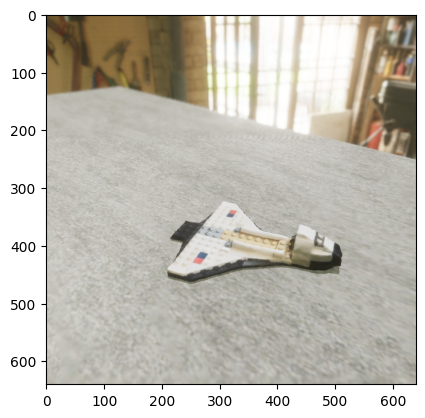

In [ ]:
# display image at sequence.0/step0.camera.png
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

img = Image.open(os.path.join(shuttle_images_dir, "sequence.11/step0.camera.png"))
plt.imshow(img)

In [ ]:
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={0: 'x'})
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={1: 'y'})
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={2: 'z'})

In [ ]:
shuttle_euler_rots_df = shuttle_euler_rots_df.reindex(columns=['img name', 'x', 'y', 'z'])

In [ ]:
shuttle_main_annotations = shuttle_euler_rots_df.to_csv('/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/shuttle_main_annotations.csv', index=False)
shuttle_euler_rots_df.to_csv(shuttle_main_annotations, index=False)

'img name,x,y,z\nsequence.0/step0.camera.png,-0.711783888888889,-0.10985944444444443,-1.0\nsequence.1/step0.camera.png,-0.932495,-0.5466655555555555,-1.0\nsequence.2/step0.camera.png,-0.6903455555555555,-0.765118888888889,-1.0\nsequence.3/step0.camera.png,-0.7457505555555555,-0.25965888888888883,-1.0\nsequence.4/step0.camera.png,-0.7176572222222223,-0.16489999999999994,-1.0\nsequence.5/step0.camera.png,-0.6777466666666666,-0.7106722222222221,-1.0\nsequence.6/step0.camera.png,-0.7400827777777778,0.92246,-1.0\nsequence.7/step0.camera.png,-0.7182927777777778,0.6992055555555557,-1.0\nsequence.8/step0.camera.png,-0.5680783333333334,-0.2823338888888889,-1.0\nsequence.9/step0.camera.png,-0.7617677777777778,0.08142499999999997,-1.0\nsequence.10/step0.camera.png,-0.8947994444444444,-0.9535872222222223,-1.0\nsequence.11/step0.camera.png,-0.9956561111111111,-0.7902783333333333,-1.0\nsequence.12/step0.camera.png,-0.8246938888888888,-0.9768683333333333,-1.0\nsequence.13/step0.camera.png,-0.750425,-

In [ ]:
shuttle_euler_rots_df.head(5)

,img name,x,y,z
0,sequence.0/step0.camera.png,-0.711784,-0.109859,-1.0
1,sequence.1/step0.camera.png,-0.932495,-0.546666,-1.0
2,sequence.2/step0.camera.png,-0.690346,-0.765119,-1.0
3,sequence.3/step0.camera.png,-0.745751,-0.259659,-1.0
4,sequence.4/step0.camera.png,-0.717657,-0.164900,-1.0


In [ ]:
shuttle_main_annotations = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/shuttle_main_annotations.csv'
shuttle_euler_rots_df = pd.read_csv(shuttle_main_annotations, sep=",")


In [ ]:
shuttle_euler_rots_df.head(5)

,img name,x,y,z
0,sequence.0/step0.camera.png,-0.711784,-0.109859,-1.0
1,sequence.1/step0.camera.png,-0.932495,-0.546666,-1.0
2,sequence.2/step0.camera.png,-0.690346,-0.765119,-1.0
3,sequence.3/step0.camera.png,-0.745751,-0.259659,-1.0
4,sequence.4/step0.camera.png,-0.717657,-0.164900,-1.0


In [ ]:

shuttle_euler_rots_df.fillna('sequence.20000/step0.camera.png', inplace=True)

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Define the custom model
class ResNetRotationModel(nn.Module):
    def __init__(self, pretrained=True):
        super(ResNetRotationModel, self).__init__()
        # Load a pre-trained ResNet model
        self.backbone = models.resnet18(pretrained=pretrained)
        num_features = self.backbone.fc.in_features
        # Replace the fully connected layer with a custom head for regression
        self.backbone.fc = nn.Linear(num_features, 3)  # Output x, y, z rotations

    def forward(self, x):
        return self.backbone(x)

# Define a custom dataset
class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load rotation labels (x, y, z)
        rotation_labels = self.annotations.iloc[idx, 1:4].values.astype('float')
        rotation_labels = torch.tensor(rotation_labels, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, rotation_labels

# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped/shuttle/shuttle_main/'
annotations_file = shuttle_euler_rots_df

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization for ResNet
])

# Split data
train_annotations, test_annotations = train_test_split(annotations_file, test_size=0.2, random_state=42)


train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Model, loss, and optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = ResNetRotationModel(pretrained=True).to(device)



criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, rotation_labels in train_loader:
        images, rotation_labels = images.to(device), rotation_labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, rotation_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for test_images, test_rotation_labels in test_loader:
            test_images, test_rotation_labels = test_images.to(device), test_rotation_labels.to(device)
            test_outputs = model(test_images)
            test_loss += criterion(test_outputs, test_rotation_labels).item()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}")


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 0.07613761723041534, Test Loss: 0.12298564997220797
Epoch 2, Loss: 0.1057080328464508, Test Loss: 0.12172929995826312
Epoch 3, Loss: 0.14703361690044403, Test Loss: 0.1250568132788416
Epoch 4, Loss: 0.10401090979576111, Test Loss: 0.13003242991509892
Epoch 5, Loss: 0.07847034931182861, Test Loss: 0.1393223185506132
Epoch 6, Loss: 0.06312790513038635, Test Loss: 0.1508380440729005
Epoch 7, Loss: 0.04724058508872986, Test Loss: 0.15518984080307066
Epoch 8, Loss: 0.02804897353053093, Test Loss: 0.14987792056940852


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bfbda5c7ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bfbda5c7ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 9, Loss: 0.02793418988585472, Test Loss: 0.15239016013959097


Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bfbda5c7ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/python3.10/multiprocessing/process.py", line 160, in is_alive
    assert self._parent_pid == os.getpid(), 'can only test a child process'
AssertionError: can only test a child process
Exception ignored in: <function _MultiProcessingDataLoaderIter.__del__ at 0x7bfbda5c7ac0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1604, in __del__
    self._shutdown_workers()
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py", line 1587, in _shutdown_workers
    if w.is_alive():
  File "/usr/lib/

Epoch 10, Loss: 0.01909918710589409, Test Loss: 0.14897889436946976


In [ ]:
#unzip folder
!unzip /content/drive/MyDrive/CV_FinalProj_Data/shuttle_unzipped.zip

In [ ]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_main_closeDist.zip'
extract_dir = '/content/drive/MyDrive/CV_FinalProj_Data/close_dist'

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

shuttle_euler_text_file = '/content/drive/MyDrive/CV_FinalProj_Data/close_dist/shuttle_main_closeDist/0.txt'
shuttle_euler_rots_df = pd.read_csv(shuttle_euler_text_file, sep=",", header=None)

In [4]:
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={0: 'x'})
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={1: 'y'})
shuttle_euler_rots_df = shuttle_euler_rots_df.rename(columns={2: 'z'})

In [5]:
shuttle_euler_rots_df = (shuttle_euler_rots_df - 180.0)/180.0

In [6]:
shuttle_euler_rots_df['img name'] = ""
# create annotations file:
for i in range(0,20000):
  shuttle_euler_rots_df.loc[i, 'img name'] = "sequence." + str(i) + "/" + "step0.camera.png"

In [7]:
shuttle_euler_rots_df = shuttle_euler_rots_df.reindex(columns=['img name', 'x', 'y', 'z'])

In [9]:
shuttle_euler_rots_df.tail(5)

,img name,x,y,z
19996,sequence.19996/step0.camera.png,-0.711986,-0.290344,-1.0
19997,sequence.19997/step0.camera.png,-0.652041,0.259622,-1.0
19998,sequence.19998/step0.camera.png,-0.803894,-0.423482,-1.0
19999,sequence.19999/step0.camera.png,-0.854223,0.974591,-1.0
20000,sequence.20000/step0.camera.png,-0.737619,0.796913,-1.0


In [8]:
shuttle_euler_rots_df.loc[20000, 'img name'] = "sequence.20000/step0.camera.png"

In [16]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torch.nn.functional as F

# Define the custom model
class ResNetRotationModel(nn.Module):
    def __init__(self, pretrained=True):
        super(ResNetRotationModel, self).__init__()
        # Load a pre-trained ResNet model
        self.backbone = models.resnet18(pretrained=pretrained)
        num_features = self.backbone.fc.in_features
        # Replace the fully connected layer with a custom head for regression
        self.backbone.fc = nn.Linear(num_features, 3)  # Output x, y, z rotations

    def forward(self, x):
        return self.backbone(x)

# Define a custom dataset
class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load rotation labels (x, y, z)
        rotation_labels = self.annotations.iloc[idx, 1:4].values.astype('float')
        rotation_labels = torch.tensor(rotation_labels, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, rotation_labels

# Paths
images = '/content/drive/MyDrive/CV_FinalProj_Data/close_dist/shuttle_main_closeDist/solo/'
annotations_file = shuttle_euler_rots_df

# Define transformations for images
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to match ResNet input size
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization for ResNet
])

# Split data
train_annotations, test_annotations = train_test_split(annotations_file, test_size=0.2, random_state=42)


train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Model, loss, and optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = ResNetRotationModel(pretrained=True).to(device)



criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



# Training loop
num_epochs = 7
for epoch in range(num_epochs):
    model.train()
    for images, rotation_labels in train_loader:
        images, rotation_labels = images.to(device), rotation_labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, rotation_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for test_images, test_rotation_labels in test_loader:
            test_images, test_rotation_labels = test_images.to(device), test_rotation_labels.to(device)
            test_outputs = model(test_images)
            test_loss += criterion(test_outputs, test_rotation_labels).item()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}")

Epoch 1, Loss: 0.0035539446398615837, Test Loss: 0.008887572286997937
Epoch 2, Loss: 0.003181790467351675, Test Loss: 0.00431739019982088
Epoch 3, Loss: 0.004285516683012247, Test Loss: 0.007687833756097548
Epoch 4, Loss: 0.0007871666457504034, Test Loss: 0.0020286039389103526
Epoch 5, Loss: 0.0003778823302127421, Test Loss: 0.0022934313869521408
Epoch 6, Loss: 0.00018747092690318823, Test Loss: 0.0017354340046054743
Epoch 7, Loss: 0.0007155972416512668, Test Loss: 0.002661787188290397


In [17]:
# prompt: save the model weights

# Save the trained model's state dictionary
torch.save(model.state_dict(), '/content/drive/MyDrive/USD/rotation_closer_resnet_model.pth')

In [18]:
predictions = []
model.eval()
with torch.no_grad():
    for test_images, test_rotation_labels in test_loader:
        test_images = test_images.to(device)
        test_outputs = model(test_images)
        predictions.extend(test_outputs.cpu().numpy())

In [19]:
import numpy as np
predictions_array = np.array(predictions)
orig = []

for val in test_annotations.iloc[:, 1:4].values:
  orig.append(val)

orig_array = np.array(orig)

predictions_degrees = predictions_array * 180.0
orig_degrees = orig_array * 180.0

differences = orig_degrees - predictions_degrees
differences = np.abs(differences)

differences_df = pd.DataFrame(differences, columns=['x', 'y', 'z'])

x_avg = differences_df['x'].mean()
y_avg = differences_df['y'].mean()
z_avg = differences_df['z'].mean()

print(f"Average difference in x: {x_avg}")
print(f"Average difference in y: {y_avg}")
print(f"Average difference in z: {z_avg}")

differences_df.head(10)




Average difference in x: 2.760794118410705
Average difference in y: 5.993273260956971
Average difference in z: 1.7534514445668368


,x,y,z
0,1.865738,6.730798,4.652481
1,2.446438,7.724503,2.065948
2,3.196534,0.548869,2.474045
3,1.555662,1.826883,0.031326
4,1.009450,7.484437,2.844788
5,0.899486,1.838891,4.359573
6,0.293295,4.814823,1.943695
7,6.109125,2.295962,4.314133
8,4.980198,17.045195,5.376373
9,5.456059,17.745663,3.732147


# test the resnet 18 on closer images on real world data

In [20]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_rw_45degs.zip'
extract_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_realworld_45degs'

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [28]:
real_rots = pd.read_csv('/content/drive/MyDrive/CV_FinalProj_Data/shuttle_realworld_45degs/shuttle_rw_45degs/angles.csv', sep=",")

real_rots['X'] = (real_rots['X'] - 180.0) / 180.0
real_rots['Y'] = (real_rots['Y'] - 180.0)/ 180.0
real_rots['Z'] = (real_rots['Z'] - 180.0)/ 180.0

real_rots.tail(5)

,Image File,X,Y,Z
221,IMG_4662.png,-0.75,0.5,-1.0
222,IMG_4670.png,-0.75,0.5,-1.0
223,IMG_4677.png,-0.75,0.5,-1.0
224,IMG_4685.png,-0.75,0.5,-1.0
225,IMG_4693.png,-0.75,0.5,-1.0


In [29]:
# Path to the new test images and their labels
new_test_images = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_realworld_45degs/shuttle_rw_45degs/images/'
new_test_annotations_file = real_rots  # DataFrame containing labels for the new test images

# Reuse the same transform pipeline
new_transform = transform  # Already defined

# Create a new dataset and dataloader for the new test images
new_test_dataset = RotationDataset(image_dir=new_test_images, annotations=new_test_annotations_file, transform=new_transform)
new_test_loader = DataLoader(new_test_dataset, batch_size=32, shuffle=False, num_workers=4)

predictions = []
model.eval()
with torch.no_grad():
    for test_images, test_rotation_labels in new_test_loader:
        test_images = test_images.to(device)
        test_outputs = model(test_images)
        predictions.extend(test_outputs.cpu().numpy())


In [53]:
predictions_array = np.array(predictions)
orig = []

for val in new_test_annotations_file.iloc[:, 1:4].values:
  orig.append(val)

orig_array = np.array(orig)

predictions_degrees = predictions_array * 180.0
orig_degrees = orig_array * 180.0

differences = []

a = -100
b = 175

c = 85

def Get_Difference(a, b):
  differences = []
  for i in range (0, len(a)):
    diff_a = 180
    if (a[i] < 0) and (b[i] > 0):
      diff_a = abs((a[i] + 180) - (b[i]+180))
    elif (a[i] > 0 and b[i] < 0):
      diff_a = abs((a[i] - 180) - (b[i] - 180))
    diff_b = abs(a[i] - b[i])
    differences.append(min(diff_a, diff_b))
  return differences


x_diff = Get_Difference(orig_array[:, 0]*180, predictions_array[:,0]*180)
y_diff = Get_Difference(orig_array[:, 1]*180, predictions_array[:,1]*180)
z_diff = Get_Difference(orig_array[:, 2]*180, predictions_array[:,2]*180)

differences = np.array([x_diff, y_diff, z_diff])
differences = differences.T


differences_df = pd.DataFrame(differences, columns=['X', 'Y', 'Z'])

x_avg = np.mean(x_diff)
y_avg = np.mean(y_diff)
z_avg = np.mean(z_diff)


print(f"Average difference in x: {x_avg}")
print(f"Average difference in y: {y_avg}")
print(f"Average difference in z: {z_avg}")

x_mean = np.median(x_diff)
y_mean = np.median(y_diff)
z_mean = np.median(z_diff)

print(f"Mean difference in x: {x_mean}")
print(f"Mean difference in y: {y_mean}")
print(f"Mean difference in z: {z_mean}")

differences_df.head(10)
print(x_diff)

Average difference in x: 12.054029954218231
Average difference in y: 32.23366303280392
Average difference in z: 3.3058475730693444
Mean difference in x: 11.380596160888672
Mean difference in y: 11.200945854187012
Mean difference in z: 2.58428955078125
[7.365303039550781, 0.179107666015625, 15.182411193847656, 21.783355712890625, 23.695266723632812, 13.366218566894531, 0.7610321044921875, 6.128662109375, 8.597007751464844, 0.5527191162109375, 16.570709228515625, 12.380928039550781, 9.837882995605469, 15.051437377929688, 16.917808532714844, 3.62530517578125, 12.000480651855469, 1.1167831420898438, 5.218345642089844, 14.082870483398438, 2.1899261474609375, 9.640640258789062, 18.081443786621094, 5.113868713378906, 7.3324432373046875, 14.203147888183594, 11.799713134765625, 14.022193908691406, 6.596466064453125, 3.2951889038085938, 10.252037048339844, 20.61310577392578, 6.878120422363281, 10.820274353027344, 11.011421203613281, 5.709617614746094, 4.037193298339844, 3.3646926879882812, 0.013

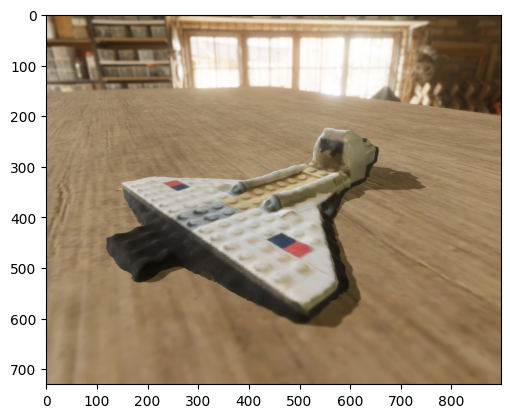

In [ ]:
# display image at sequence.0/step0.camera.png
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import os

shuttle_images_dir = '/content/drive/MyDrive/CV_FinalProj_Data/close_dist/shuttle_main_closeDist/solo/'
img = Image.open(os.path.join(shuttle_images_dir, "sequence.11/step0.camera.png"))
plt.imshow(img)

# Cropped Edition



In [ ]:
import os
import math

In [ ]:
images_dir = '/content/drive/MyDrive/CV_FinalProj_Data/Shuttle_main_cropped/images'
labels_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_main/shuttle_main_rotations.txt'

In [ ]:
labels_df = pd.read_csv(labels_dir, header=None)
labels_df['image name'] = ""
for idx, fow in enumerate(os.listdir(images_dir)):
  labels_df.loc[idx, 'image name'] = 'sequence.' + str(idx) + '.png'
# rename the first 3 columns to x,y, and z
labels_df = labels_df.rename(columns={0: 'x'})
labels_df = labels_df.rename(columns={1: 'y'})
labels_df = labels_df.rename(columns={2: 'z'})
labels_df = labels_df.reindex(columns=['image name', 'x', 'y', 'z'])
# normalize the x and y columns by subtracting 180 and then dividing by 180


In [ ]:
# prompt: # normalize the x and y columns by subtracting 180 and then dividing by 180

labels_df[['x', 'y', 'z']] = (labels_df[['x', 'y', 'z']] - 180.0) / 180.0

In [ ]:
labels_df.head(5)

,image name,x,y,z
0,sequence.0.png,-0.717339,-0.115415,-1.0
1,sequence.1.png,-0.938051,-0.552221,-1.0
2,sequence.2.png,-0.695901,-0.770674,-1.0
3,sequence.3.png,-0.751306,-0.265214,-1.0
4,sequence.4.png,-0.723213,-0.170456,-1.0


In [ ]:
# multiply by 180 and add 180
labels_df_old = labels_df.copy()
labels_df_old[['x', 'y', 'z']] = labels_df[['x', 'y', 'z']] * 180.0 + 180.0
labels_df_old.head(5)

,image name,x,y,z
0,sequence.0.png,50.8789,159.2253,0.0
1,sequence.1.png,11.1509,80.6002,0.0
2,sequence.2.png,54.7378,41.2786,0.0
3,sequence.3.png,44.7649,132.2614,0.0
4,sequence.4.png,49.8217,149.3180,0.0


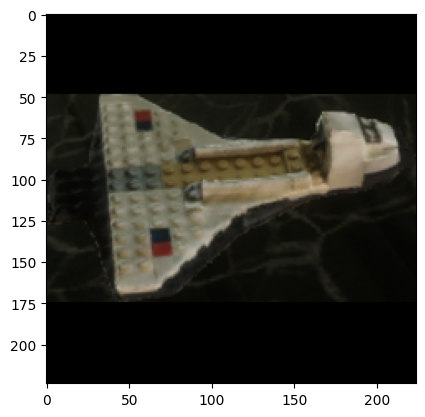

In [ ]:
from torchvision import transforms
from PIL import Image, ImageOps
import matplotlib.pyplot as plt
image_path = "/content/drive/MyDrive/CV_FinalProj_Data/Shuttle_main_cropped/images/sequence.6.png"

# resize to transforms.Resize((224, 224)),
img = Image.open(image_path).convert("RGB")
img = resize_with_padding(img, target_size=(224, 224), fill=(0, 0, 0))
plt.imshow(img)

In [ ]:
print(images_dir)

/content/drive/MyDrive/CV_FinalProj_Data/Shuttle_main_cropped/images


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import models, transforms
from torch.utils.data import Dataset, DataLoader
from PIL import Image
import pandas as pd
import os
from sklearn.model_selection import train_test_split
import torch.nn.functional as F



# Define the custom model
class ResNetRotationModel(nn.Module):
    def __init__(self, pretrained=True):
        super(ResNetRotationModel, self).__init__()
        # Load a pre-trained ResNet model
        self.backbone = models.resnet50(pretrained=pretrained)
        num_features = self.backbone.fc.in_features
        # Replace the fully connected layer with a custom head for regression
        self.backbone.fc = nn.Linear(num_features, 3)  # Output x, y, z rotations

    def forward(self, x):
        return self.backbone(x)

# Define a custom dataset
class RotationDataset(Dataset):
    def __init__(self, image_dir, annotations, transform=None):
        self.image_dir = image_dir
        self.annotations = annotations
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        if isinstance(idx, torch.Tensor):
            idx = idx.item()

        # Load image
        img_name = os.path.join(self.image_dir, str(self.annotations.iloc[idx, 0]))
        image = Image.open(img_name).convert("RGB")

        # Load rotation labels (x, y, z)
        rotation_labels = self.annotations.iloc[idx, 1:4].values.astype('float')
        rotation_labels = torch.tensor(rotation_labels, dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, rotation_labels

# Paths
images = images_dir
annotations_file = labels_df

def resize_with_padding(img, target_size=(224, 224), fill=(0, 0, 0)):
    original_width, original_height = img.size
    target_width, target_height = target_size
    aspect_ratio = original_width / original_height

    # Calculate new dimensions
    if aspect_ratio > 1:  # Wider than tall
        new_width = target_width
        new_height = int(target_width / aspect_ratio)
    else:  # Taller than wide
        new_height = target_height
        new_width = int(target_height * aspect_ratio)

    # Resize the image
    resized_img = img.resize((new_width, new_height))

    # Add padding to center the image
    padded_img = ImageOps.expand(
        resized_img,
        border=(
            (target_width - new_width) // 2,
            (target_height - new_height) // 2,
            (target_width - new_width + 1) // 2,
            (target_height - new_height + 1) // 2,
        ),
        fill=fill,
    )
    return padded_img

# Define the transforms.Compose pipeline
transform = transforms.Compose([
    transforms.Lambda(lambda img: resize_with_padding(img, target_size=(224, 224), fill=(0, 0, 0))),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Standard normalization for ResNet
])



# Split data
train_annotations, test_annotations = train_test_split(annotations_file, test_size=0.2, random_state=42)


train_dataset = RotationDataset(image_dir=images, annotations=train_annotations, transform=transform)
test_dataset = RotationDataset(image_dir=images, annotations=test_annotations, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=4)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False, num_workers=4)

# Model, loss, and optimizer
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
model = ResNetRotationModel(pretrained=True).to(device)



criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)



# Training loop
num_epochs = 10
for epoch in range(num_epochs):
    model.train()
    for images, rotation_labels in train_loader:
        images, rotation_labels = images.to(device), rotation_labels.to(device)

        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, rotation_labels)
        loss.backward()
        optimizer.step()

    # Evaluation
    model.eval()
    test_loss = 0
    with torch.no_grad():
        for test_images, test_rotation_labels in test_loader:
            test_images, test_rotation_labels = test_images.to(device), test_rotation_labels.to(device)
            test_outputs = model(test_images)
            test_loss += criterion(test_outputs, test_rotation_labels).item()

    print(f"Epoch {epoch + 1}, Loss: {loss.item()}, Test Loss: {test_loss / len(test_loader)}")

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1, Loss: 0.08749908208847046, Test Loss: 0.12246440824062105
Epoch 2, Loss: 0.1432625651359558, Test Loss: 0.12034300708818058
Epoch 3, Loss: 0.11856242269277573, Test Loss: 0.12050046416975203
Epoch 4, Loss: 0.11369520425796509, Test Loss: 0.12507592194846698
Epoch 5, Loss: 0.11713434755802155, Test Loss: 0.1379903027462581
Epoch 6, Loss: 0.09095199406147003, Test Loss: 0.1512274785292527
Epoch 7, Loss: 0.051060765981674194, Test Loss: 0.16124791515961526
Epoch 8, Loss: 0.0254680123180151, Test Loss: 0.15302635534178644
Epoch 9, Loss: 0.017315536737442017, Test Loss: 0.1515230436528486
Epoch 10, Loss: 0.031265828758478165, Test Loss: 0.14800380619745407


In [ ]:
# prompt: # get predictions and compare to original, then multiply both by 180 and get average difference

predictions = []
model.eval()
with torch.no_grad():
    for test_images, test_rotation_labels in test_loader:
        test_images = test_images.to(device)
        test_outputs = model(test_images)
        predictions.extend(test_outputs.cpu().numpy())
predictions_array = np.array(predictions)
orig = []

for val in test_annotations.iloc[:, 1:4].values:
  orig.append(val)

orig_array = np.array(orig)

predictions_degrees = predictions_array * 180.0
orig_degrees = orig_array * 180.0

differences = orig_degrees - predictions_degrees
differences = np.abs(differences)

differences_df = pd.DataFrame(differences, columns=['x', 'y', 'z'])

x_avg = differences_df['x'].mean()
y_avg = differences_df['y'].mean()
z_avg = differences_df['z'].mean()

print(f"Average difference in x: {x_avg}")
print(f"Average difference in y: {y_avg}")
print(f"Average difference in z: {z_avg}")

differences_df.head(10)

Average difference in x: 25.638549886737913
Average difference in y: 96.96026098789615
Average difference in z: 1.3987358992344199


,x,y,z
0,20.547286,120.010142,4.417999
1,10.865977,4.980507,2.590668
2,3.833603,155.534386,1.545380
3,29.075725,36.584063,1.103897
4,27.883676,11.522525,2.342133
5,29.956245,148.099441,0.033920
6,4.944537,117.893517,1.109634
7,14.045554,156.824156,0.650192
8,47.167326,182.751873,2.366913
9,39.780833,143.265802,0.956284


In [ ]:
torch.save(model.state_dict(), '/content/drive/MyDrive/USD/rotation_resnet_model.pth')

In [ ]:
import zipfile
import os

from google.colab import drive
drive.mount('/content/drive')

zip_file_path = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_realworld_data.zip'
extract_dir = '/content/drive/MyDrive/CV_FinalProj_Data/shuttle_realworld_data'

# Create the extract directory if it doesn't exist
os.makedirs(extract_dir, exist_ok=True)

with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
real_rots = []

for idx in range(0,298):
  rot_file = os.path.join(extract_dir,'shuttle_realworld_data','rot_' + str(idx) + '.txt')
  with open(rot_file, 'r') as f:
    rot_text = f.read()
    rot_vals = rot_text.split('\n')[0]
    rot_vals = rot_vals.split(',')
    rot_vals = [float(val) for val in rot_vals]
    real_rots.append(rot_vals)


In [ ]:
real_data = pd.DataFrame(real_rots, columns=['x', 'y', 'z'])
real_data.head(5)

,x,y,z
0,289.7448,359.6056,187.5341
1,289.7448,359.6056,187.5341
2,291.5407,183.4960,1.3609
3,291.5407,183.4960,1.3609
4,291.5407,183.4960,1.3609


In [ ]:
real_data['image name'] = ""
for idx in range(0,298):
  real_data.loc[idx, 'image name'] = 'SavedTexture' + str(idx) + '.png'

In [ ]:
real_data = real_data.reindex(columns=['image name', 'x', 'y', 'z'])
real_data.head(5)

normalized_real_data = real_data.copy()
normalized_real_data[['x', 'y', 'z']] = (normalized_real_data[['x', 'y', 'z']] - 180.0) / 180.0
normalized_real_data.head(5)

,image name,x,y,z
0,SavedTexture0.png,0.609693,0.997809,0.041856
1,SavedTexture1.png,0.609693,0.997809,0.041856
2,SavedTexture2.png,0.619671,0.019422,-0.992439
3,SavedTexture3.png,0.619671,0.019422,-0.992439
4,SavedTexture4.png,0.619671,0.019422,-0.992439


In [ ]:
normalized_real_data.head()

,image name,x,y,z
0,SavedTexture0.png,0.609693,0.997809,0.041856
1,SavedTexture1.png,0.609693,0.997809,0.041856
2,SavedTexture2.png,0.619671,0.019422,-0.992439
3,SavedTexture3.png,0.619671,0.019422,-0.992439
4,SavedTexture4.png,0.619671,0.019422,-0.992439
